In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Favourite Author
This analysis is about authors. We consider, the author whose name comes in dataset more often, as the favourite author. 

## Favourite author (all books in library)
First, let us take a count of books written by each author and sort them in descending order to see who wrote the most number of books available in library. There could be a reason why this authors books are abundant in library. 

We have to consider two cases:
- Consider unique books only. In that case we are taking the count of unique books that are available in library and written by the author.
- Consider copies of books also. A book can have multiple copies. 

Here we are simply querying on details of books stored in library. The department selector and date widgets have no influence on these results.

### Case 1: Unique books only
Showing top 10 authors by default. Adjust the value of 'rank' parameter to display more results.

In [2]:
# Variables that can be manipulated by widgets
rank = 10
chart_type = "pie"
start_dt = "2016-05-06"
end_dt = "2022-06-08"
depts = ['GENERAL', 'CS', 'IT', 'EC', 'ME', 'MECHANICAL',
         'INFORMATION TECHNOLOGY', 'COMPUTER SCIENCE', 'M Tech CS CL',
         'EEE', 'ELECTRONICS AND COMMUNICATION', 'Ph.D', 'PHYSICS', 'CE',
         'ECONOMICS', 'ELECTRICAL', 'M Tech ME ROB', 'CENTRAL LIBRARY',
         'CIVIL', 'MATHEMATICS', 'CHEMISTRY']


In [4]:
# DataFrame of unique books in library
df = pd.read_csv("src/unq_bks2.csv", index_col=0)
# df

In [5]:
# Counting number of books written by each author in unique books.
df1 = df['author'].value_counts().sort_values(ascending=False).head(int(rank))
# df1

In [6]:
# function to add lables above bar plot
def addlabels(x, y):
	for i in range(len(x)):
		plt.text(i, y[i], y[i], ha='center')

In [7]:
# Creating  two lists for plotting graph
def series_to_list(df, rank=100):
    """
    Convert pandas series object to two lists x and y. 
    This makes plotting graph with matplotlib easier.
    We only consider maximum of 100 values for plotting graph.
    """
    count = 0
    x , y = [], []
    for i, j in df.iteritems():
        x.append(i)
        y.append(j)
        count += 1
        if count == rank:
            break
    return (x, y)

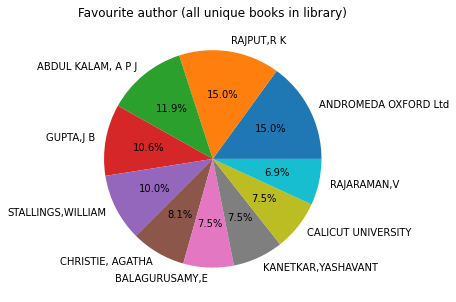

In [8]:
x, y = series_to_list(df1)

if (chart_type == "bar"):
    plt.figure(figsize=(10, 5))
    plt.bar(x, y)
    # Adding count above bar
    addlabels(x, y)
    plt.xticks(range(len(x)), x, rotation='vertical') # vertically align x axis values
    plt.title(f"Favourite author (all unique books in library)")
    plt.xlabel("Author")
    plt.ylabel("Number of books")
    plt.show()
elif(chart_type == "pie"):
    fig = plt.figure(figsize=(10, 5))
    # use autopct to show percentage on diagram
    plt.pie(y, labels=x, autopct='%1.1f%%')
    plt.title(f"Favourite author (all unique books in library)")
    plt.show()


In [9]:
# Print the result as table
df1

ANDROMEDA OXFORD Ltd    24
RAJPUT,R K              24
ABDUL KALAM, A P J      19
GUPTA,J B               17
STALLINGS,WILLIAM       16
CHRISTIE, AGATHA        13
BALAGURUSAMY,E          12
KANETKAR,YASHAVANT      12
CALICUT UNIVERSITY      12
RAJARAMAN,V             11
Name: author, dtype: int64

### Case 2: Considering copies also
Here, we consider copies of same book as separate books. That is if '8051 MICROCONTROLLER' by 'AYALA,KENNETH J' has 3 copies, then author's name will be counted 3 times. 

In [10]:
df2 = pd.read_csv('src/clean1_bookDetails.csv')

In [11]:
# Counting number of books written by each author.
df3 = df2.groupby(['author'])['author'].count().sort_values(ascending=False).head(int(rank))
# df3

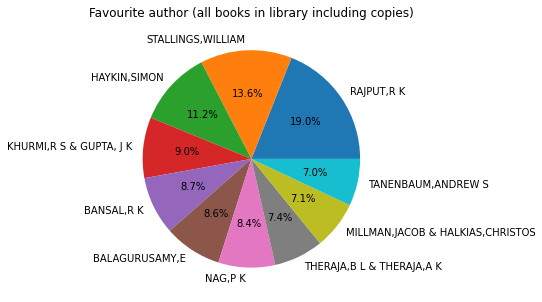

In [12]:
x, y = series_to_list(df3)

if (chart_type == "bar"):
    plt.figure(figsize=(10, 5))
    plt.bar(x, y)
    # Adding count above bar
    addlabels(x, y)
    # vertically align x axis values
    plt.xticks(range(len(x)), x, rotation='vertical')
    plt.title(f"Favourite author (all unique books in library)")
    plt.xlabel("Author")
    plt.ylabel("Number of books")
    plt.show()
elif(chart_type == "pie"):
    fig = plt.figure(figsize=(10, 5))
    # use autopct to show percentage on diagram
    plt.pie(y, labels=x, autopct='%1.1f%%')
    plt.title(f"Favourite author (all books in library including copies)")
    plt.show()


In [13]:
# Print the result in tabular form
df3

author
RAJPUT,R K                          261
STALLINGS,WILLIAM                   187
HAYKIN,SIMON                        154
KHURMI,R S & GUPTA, J K             124
BANSAL,R K                          119
BALAGURUSAMY,E                      118
NAG,P K                             116
THERAJA,B L & THERAJA,A K           101
MILLMAN,JACOB & HALKIAS,CHRISTOS     98
TANENBAUM,ANDREW S                   96
Name: author, dtype: int64

## Favourite Author (from book issue)
Now lets find who are the popular authors based on book issue details. We can find popular authors of each department by selecting department form left panel. 

Since this data is generated inside an academic library, it has strong conection with syllabus and curriculum. Because generally, most of the users (who are students) choose books related to what they study in classrooms. So change in syllabus can change 'favourites' of users. 

That is why the time is important. From the left panel you can select time period. Based on time period and departments we first filter our dataset. Then we plot authors v/s number of issues using same method discussed earlier. 

While passing arguments please consider the following tips;

- Start date must be lower than end date.
- Start date must be greater than 2016-05-06.
- End date must be lower than 2022-06-08.
- Pass dates only in YYYY-MM-DD format (eg: 2022-06-05).
- Select atleast one department.
- Adjust the rank variable to display more results. 

In [14]:
df4 = pd.read_csv("src/bkIssue_libUser_bkDetails.csv")
df4["issue_date"] = pd.to_datetime(df4["issue_date"], dayfirst=True)

In [15]:
# validation of parameters
import datetime as dt
def filter(df):
    # convert date arguments in string to date object
    try:
        start = dt.datetime.strptime(start_dt, "%Y-%m-%d")
        end = dt.datetime.strptime(end_dt, "%Y-%m-%d")
        assert start < end
        assert len(depts) > 0
        df =  df[(df["department"].isin(depts)) & (df["issue_date"] >= start) & (df["issue_date"] <= end)]
        return df
    except Exception as e:
        print("Filtering data failed with following error: " + str(e))
        return None


In [16]:
# filter based on conditions
df5 = filter(df4)
# df5

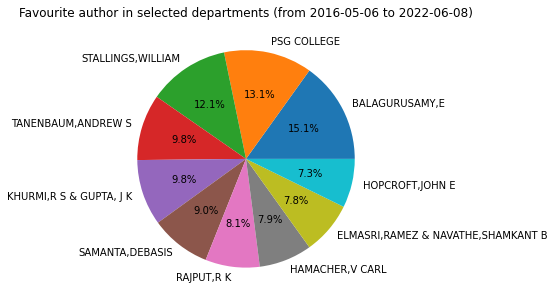

In [17]:
if (df5 is None):
    print(f"""Something bad happended. Please check your inputs""")
else:
    # grouping authors and taking count
    df6 = df5.groupby(['author'])['author'].count().sort_values(ascending=False).head(int(rank))
    x, y = series_to_list(df6)

    if (chart_type == "bar"):
        plt.figure(figsize=(10, 5))
        plt.bar(x, y)
        # Adding count above bar
        addlabels(x, y)
        # vertically align x axis values
        plt.xticks(range(len(x)), x, rotation='vertical')
        plt.title(f"Favourite author in selected departments (from {start_dt} to {end_dt})")
        plt.xlabel("Author")
        plt.ylabel("Number of issues")
        plt.show()
    elif(chart_type == "pie"):
        fig = plt.figure(figsize=(10, 5))
        # use autopct to show percentage on diagram
        plt.pie(y, labels=x, autopct='%1.1f%%')
        plt.title(f"Favourite author in selected departments (from {start_dt} to {end_dt})")
        plt.show()

In [18]:
df6

author
BALAGURUSAMY,E                        836
PSG COLLEGE                           728
STALLINGS,WILLIAM                     669
TANENBAUM,ANDREW S                    545
KHURMI,R S & GUPTA, J K               543
SAMANTA,DEBASIS                       497
RAJPUT,R K                            447
HAMACHER,V CARL                       436
ELMASRI,RAMEZ & NAVATHE,SHAMKANT B    434
HOPCROFT,JOHN E                       402
Name: author, dtype: int64